##                            Audio Debeeper

In [1]:
# Import modules

import numpy as np
import scipy.io.wavfile as s
import math
import matplotlib.pyplot as plt
import os

In [2]:
# Load files

xwav = s.read('audio/x.wav')
rate = xwav[0]
data = xwav[1]
data.shape

(63488,)

In [3]:
# Get DFT matrix

def get_F(N):
    F = np.zeros((N, N), dtype=np.complex)
    for i in range(0, N):
        for k in range(0, N):
            F[i][k] = math.cos(2 * math.pi * i * k / N) - math.sin(2 * math.pi * i * k / N)*1j
    return F

In [4]:
# Calculate F inverse

def get_Finv(N):
    for i in range(0, N):
        for k in range(0, N):
            F_inv[i][k] = math.cos(2 * math.pi * i * k / N) + math.sin(2 * math.pi * i * k / N)*1j
    return F

In [5]:
# Get hann values

def hann(n, N):
    hann_values = 0.5 * (1 - math.cos((2 * math.pi * n) / (N - 1)))
    return hann_values

In [6]:
# Applies hann values and overlaps by 50%

def get_X(N):
    length  = 2 * int(data.shape[0] / N)
    count_length = 0
    X = []
    for i in range(0, data.shape[0], int(N / 2)):
        count_length += 1
        sample = data[i : i + N]
        column_vector = np.multiply(hann_values, sample)
        X.append(column_vector)
        if(count_length >= length):
            break;
    return X    

In [7]:
N = 1600

In [8]:
F = get_F(N)

In [9]:
# Get hann values for N
hann_values = []
for value in range(N):
    val = hann(value, N)
    hann_values.append(val)

In [10]:
X = get_X(N)

In [11]:
F.shape

(1600, 1600)

In [12]:
X = np.asarray(X)
X = X.transpose()
X.shape

(1600, 78)

In [13]:
# Dot product of F, X
FX = np.dot(F, X)
FX.shape

(1600, 78)

In [14]:
FX
FX.shape
FX_mag = np.absolute(FX)

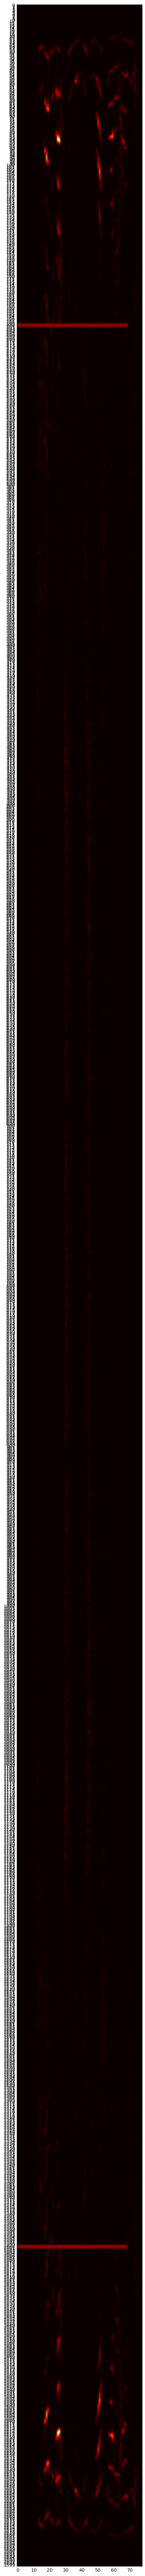

In [23]:
# Heat map of audio

plt.figure("FX Magnitude", figsize=(10, 200))
plt.yticks(np.arange(N))
plt.imshow(FX_mag, cmap = "hot")
plt.show()

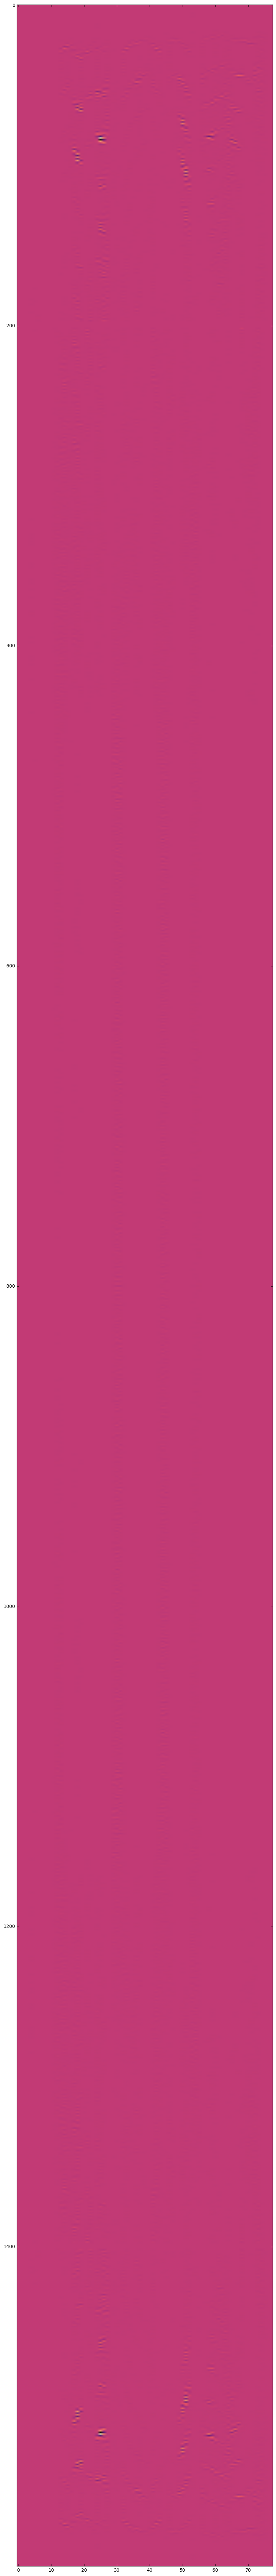

In [22]:
plt.figure("FX Real", figsize=(10, 200))
plt.imshow(FX.real , aspect = "auto", cmap = "magma")
plt.show()

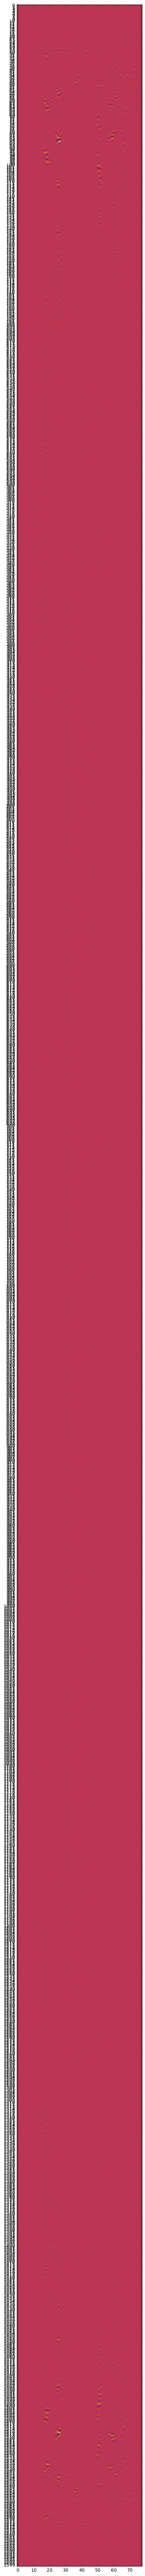

In [21]:
plt.figure("FX Imaginaray Part", figsize=(10, 200))
plt.yticks(np.arange(N))
plt.imshow(FX.imag, cmap = "inferno")
plt.show()

In [18]:
# Debeep audio file

FX[198:202, :] = 0
FX[1398:1402, :] = 0

In [19]:
# Get F Inverse

F_inv = np.zeros((N, N), dtype=np.complex)
F_inv = get_Finv(N)
F_star = np.dot(F_inv, FX)
F_star = F_star.real
F_star.shape

(1600, 78)

In [27]:
# Recover the debeeped file

recovered = np.zeros((63200))
for i in range(0, 78):
    recovered[int(i * N / 2): int(N + i*N / 2 )] += np.transpose(F_star[: , i]) 
recovered = recovered.astype(int)
recovered = np.int16(recovered/np.max(np.abs(recovered)) * 32767)
if not os.path.exists("debeeped_audio"):
    os.makedirs("debeeped_audio")
s.write('debeeped_audio/recoverd.wav', rate, recovered)